
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("shopping_trends.csv")

In [3]:
data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# пропусков в данных нет
data.isna().all()

,0
Customer ID,False
Age,False
Gender,False
Item Purchased,False
Category,False
Purchase Amount (USD),False
Location,False
Size,False
Color,False
Season,False


Составим гипотезы.

1. Сезонность покупок определённых категорий товаров.

Гипотеза: Одежда чаще покупается зимой, а аксессуары весной.

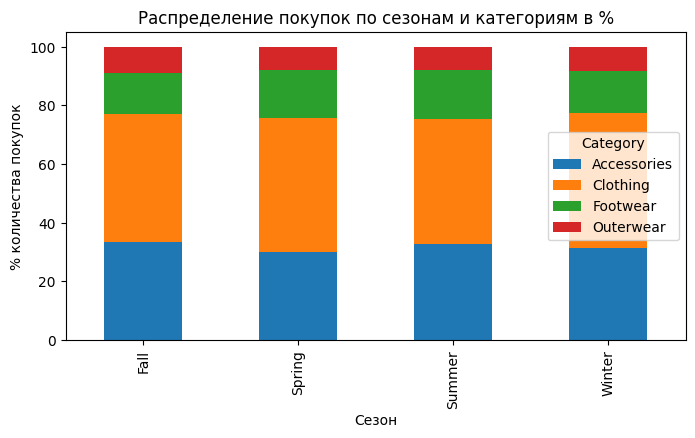

In [5]:
season_category = data.groupby(["Season", "Category"]).size().unstack()
category_season_ratios = (season_category.div(season_category.sum(axis=1), axis=0)) * 100
category_season_ratios.plot(kind="bar", stacked=True, figsize=(8, 4))
plt.title("Распределение покупок по сезонам и категориям в %")
plt.ylabel("% количества покупок")
plt.xlabel("Сезон")
plt.show()

In [6]:
category_season_ratios

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,33.230769,43.794872,13.948718,9.025641
Spring,30.130130,45.445445,16.316316,8.108108
Summer,32.670157,42.722513,16.753927,7.853403
Winter,31.204943,46.138002,14.418126,8.238929


По графику и по значениям в % можно сказать, что собой разницы нет. Гипотеза не подтвердилась.

2. Влияние возраста на сумму покупок.

Гипотеза: Молодежь склонна покупать более дешевые товары из-за тренда на быструю моду.  Т.е. молодёжь (до 30 лет) тратит меньше на покупку единичного товара, чем люди среднего возраста (30-50 лет) и пожилые (старше 50 лет).

<ipython-input-7-5881ec3fff59>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase = data.groupby("Age Group")["Purchase Amount (USD)"].mean()


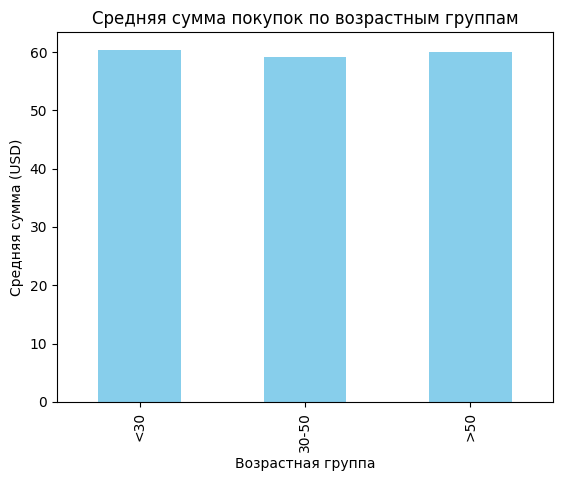

In [7]:
data["Age Group"] = pd.cut(data["Age"], bins=[0, 30, 50, 100], labels=["<30", "30-50", ">50"])
age_purchase = data.groupby("Age Group")["Purchase Amount (USD)"].mean()
age_purchase.plot(kind="bar", color="skyblue")
plt.title("Средняя сумма покупок по возрастным группам")
plt.ylabel("Средняя сумма (USD)")
plt.xlabel("Возрастная группа")
plt.show()

Нет, по нашим данным средняя сумма покупок примерно одинакова для 3х возрастных категорий.

3. Виды доставки для разных категорий товаров.

Гипотеза: Для разных категорий товаров разные виды доставки будут наиболее и наименее популярными.

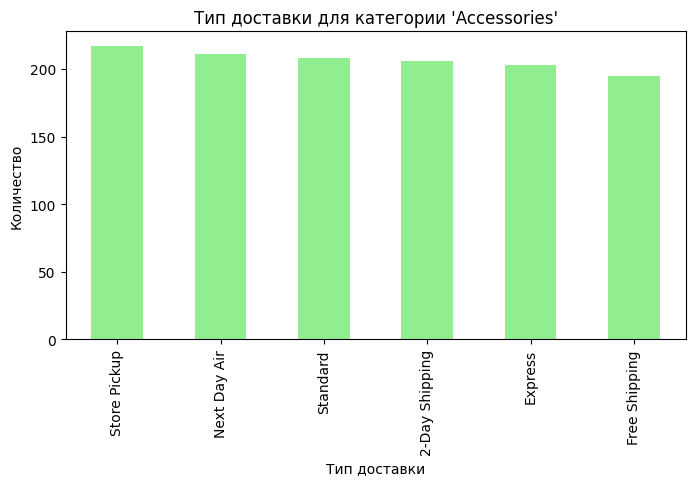

In [8]:
shipping_category1 = data[data["Category"] == "Accessories"]["Shipping Type"].value_counts()
shipping_category1.plot(kind="bar", color="lightgreen", figsize=(8, 4))
plt.title("Тип доставки для категории 'Accessories'")
plt.ylabel("Количество")
plt.xlabel("Тип доставки")
plt.show()

In [9]:
shipping_category1

,count
Shipping Type,
Store Pickup,217
Next Day Air,211
Standard,208
2-Day Shipping,206
Express,203
Free Shipping,195


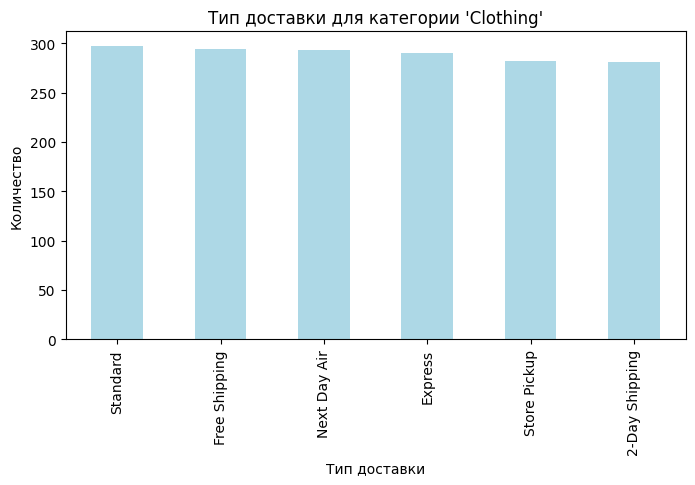

In [10]:
shipping_category2 = data[data["Category"] == "Clothing"]["Shipping Type"].value_counts()
shipping_category2.plot(kind="bar", color="lightblue", figsize=(8, 4))
plt.title("Тип доставки для категории 'Clothing'")
plt.ylabel("Количество")
plt.xlabel("Тип доставки")
plt.show()

In [11]:
shipping_category2

,count
Shipping Type,
Standard,297
Free Shipping,294
Next Day Air,293
Express,290
Store Pickup,282
2-Day Shipping,281


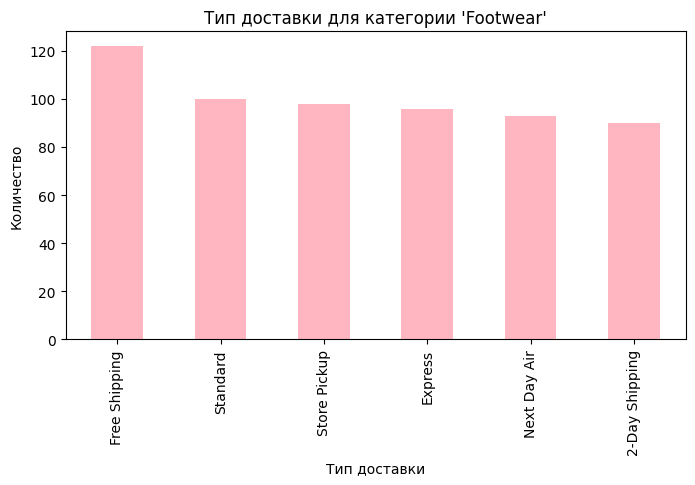

In [12]:
shipping_category3 = data[data["Category"] == "Footwear"]["Shipping Type"].value_counts()
shipping_category3.plot(kind="bar", color="lightpink", figsize=(8, 4))
plt.title("Тип доставки для категории 'Footwear'")
plt.ylabel("Количество")
plt.xlabel("Тип доставки")
plt.show()

In [13]:
shipping_category3

,count
Shipping Type,
Free Shipping,122
Standard,100
Store Pickup,98
Express,96
Next Day Air,93
2-Day Shipping,90


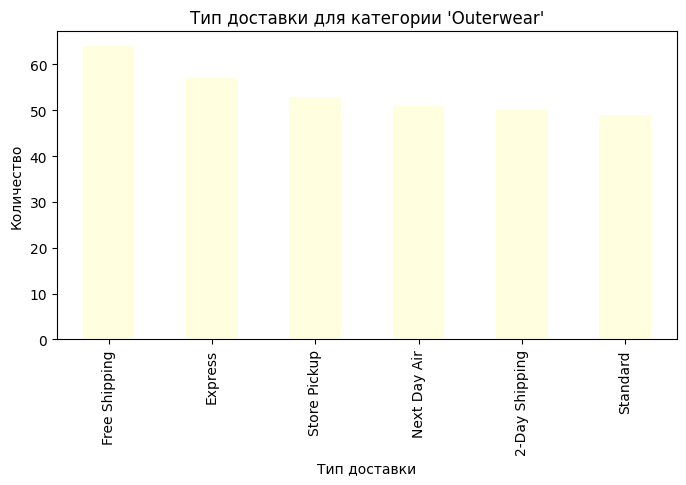

In [14]:
shipping_category4 = data[data["Category"] == "Outerwear"]["Shipping Type"].value_counts()
shipping_category4.plot(kind="bar", color="lightyellow", figsize=(8, 4))
plt.title("Тип доставки для категории 'Outerwear'")
plt.ylabel("Количество")
plt.xlabel("Тип доставки")
plt.show()

In [15]:
shipping_category4

,count
Shipping Type,
Free Shipping,64
Express,57
Store Pickup,53
Next Day Air,51
2-Day Shipping,50
Standard,49


Да, для разных видов товаров наибольшей и наименьшей популярностью пользуютя разные виды доставки.

Accessories: наибольшая - Store Pickup, наименьшая - Free Shipping.

Clothing: наибольшая - Standart, наименьшая - 2-Day Shipping.

Footwear: наибольшая - Free Shipping, наименьшая - 2-Day Shipping.

Outerwear: наибольшая - Free Shipping, наименьшая - Standart.

4. Связь цвета товаров с сезоном:

Гипотеза: Светлые цвета (например, белый, бежевый) чаще покупаются летом, а тёмные (чёрный, бордовый) — зимой.

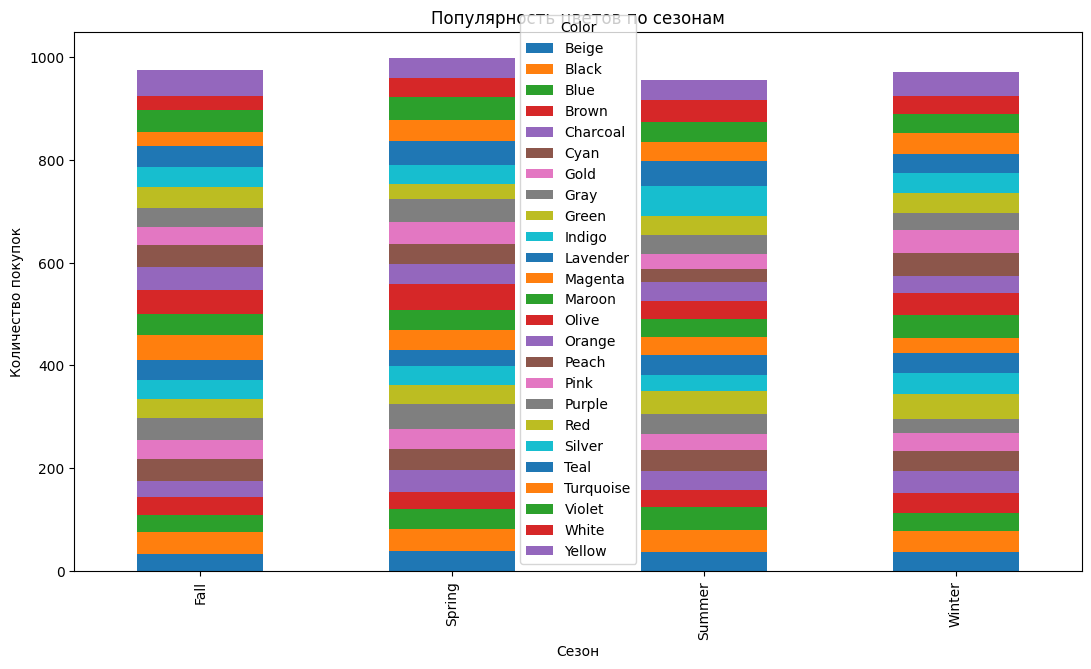

In [16]:
color_season = data.groupby(["Season", "Color"]).size().unstack().fillna(0)
color_season.plot(kind="bar", stacked=True, figsize=(13, 7))
plt.title("Популярность цветов по сезонам")
plt.ylabel("Количество покупок")
plt.xlabel("Сезон")
plt.show()

In [17]:
color_season

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow
Season,,,,,,,,,,,,,,,,,,,,,
Fall,34,42,32,35,32,43,36,44,37,37,...,42,35,37,42,39,40,27,44,27,50
Spring,39,43,39,33,42,42,38,48,38,37,...,38,44,43,31,37,46,41,45,36,40
Summer,37,42,46,33,36,42,30,40,44,32,...,24,29,38,36,59,49,36,40,43,38
Winter,37,40,35,40,43,39,34,27,50,41,...,45,45,33,39,38,37,41,37,36,46


Гипотеза не подтвердилась. Можно было бы сгруппировать цвета по светлым/ярким/темным, но так как сами значения в таблице для каждого цвета по сезонам примерно одинаковы, то в этом нет смысла. Вообще, если бы данные были реальными и были бы взяты по российскому рынку, то, вероятно, товаров черного цвета было бы больше всего и светлые и яркие вещи чаще бы покупались летом и весной.

5. Лояльность.

Гипотеза: Мужчины более лояльны и оставляют больше положительных отзывов, чем женщины.

<ipython-input-18-4a0d360947cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_review_ratios.index, y=positive_review_ratios.values, palette="coolwarm")


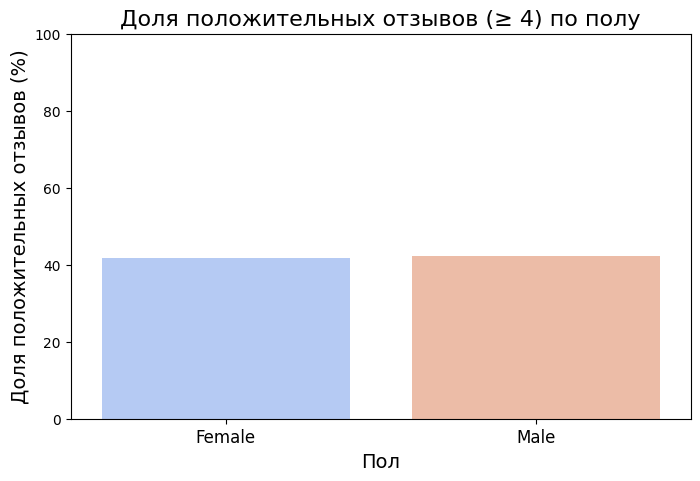

In [18]:
positive_reviews = data[data["Review Rating"] >= 4].groupby("Gender").size()
total_reviews = data.groupby("Gender").size()
positive_review_ratios = (positive_reviews / total_reviews) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=positive_review_ratios.index, y=positive_review_ratios.values, palette="coolwarm")
plt.title("Доля положительных отзывов (≥ 4) по полу", fontsize=16)
plt.xlabel("Пол", fontsize=14)
plt.ylabel("Доля положительных отзывов (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(0, 100)
plt.show()

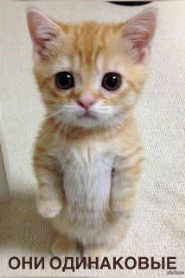

Доля положительных отзывов (больше или равно 4) для мужчин и женщин почти одинакова.

6. Частота покупок в зависимости от способа оплаты.

Гипотеза: Чаще покупатели платят с помощью PayPal.


<ipython-input-19-c629adc59a81>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


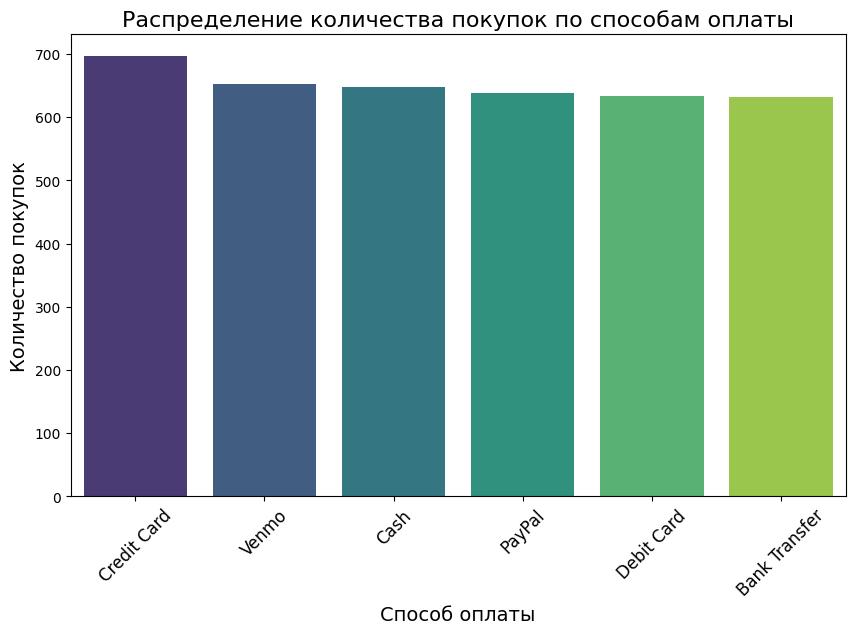

Доли способов оплаты в процентах:
Credit Card: 17.85%
Venmo: 16.74%
Cash: 16.62%
PayPal: 16.36%
Debit Card: 16.23%
Bank Transfer: 16.21%


In [19]:
payment_counts = data["Payment Method"].value_counts()
payment_ratios = (payment_counts / payment_counts.sum()) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Распределение количества покупок по способам оплаты", fontsize=16)
plt.xlabel("Способ оплаты", fontsize=14)
plt.ylabel("Количество покупок", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()
print("Доли способов оплаты в процентах:")
for method, ratio in payment_ratios.items():
    print(f"{method}: {ratio:.2f}%")

Нет, покупатели чаще всего используют кредитную карту.

7. Влияние скидок на частоту покупок.

Гипотеза: Клиенты, которым применяются скидки, покупают чаще, чем те, кто покупает без скидок.

In [20]:
discount_by_frequency = data.groupby("Frequency of Purchases").apply(
    lambda group: {
        "Total Customers": len(group),
        "Discount Applied": group[group["Discount Applied"] == "Yes"].shape[0]
    }
).apply(pd.Series)
discount_by_frequency["Discount Ratio (%)"] = (
    discount_by_frequency["Discount Applied"] / discount_by_frequency["Total Customers"] * 100
)

<ipython-input-20-0957da4e9dca>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  discount_by_frequency = data.groupby("Frequency of Purchases").apply(


In [21]:
discount_by_frequency

,Total Customers,Discount Applied,Discount Ratio (%)
Frequency of Purchases,,,
Annually,572,238,41.608392
Bi-Weekly,547,226,41.316271
Every 3 Months,584,258,44.178082
Fortnightly,542,243,44.833948
Monthly,553,237,42.857143
Quarterly,563,241,42.806394
Weekly,539,234,43.413729


Доли для всех категорий примерно одинаковы. Чуть больше применяют скидки покупатели с частотой покупок "Every 3 Months" и "Fortnightly".

8. Размер одежды и сумма покупки.

Гипотеза: Самый популярный размер для категорий Clothing и Outerwear - M.

In [22]:
clothing_data = data[data["Category"].isin(["Clothing", "Outerwear"])]
size_counts = clothing_data["Size"].value_counts()
size_percent = size_counts / size_counts.sum() * 100

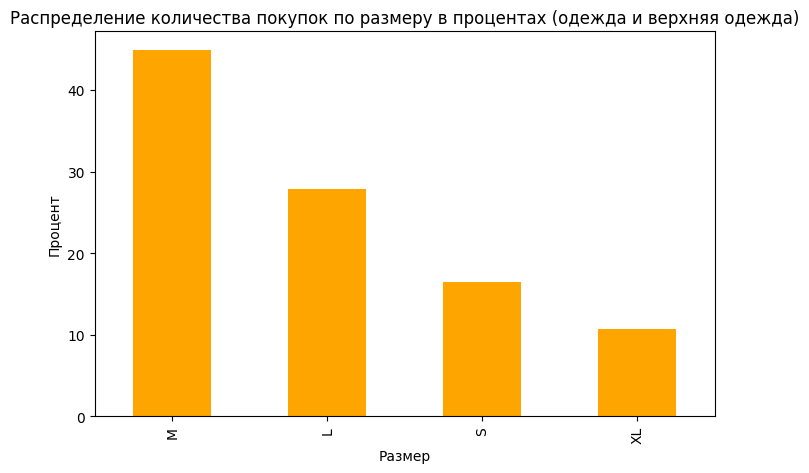

In [23]:
plt.figure(figsize=(8, 5))
size_percent.plot(kind="bar", color="orange")
plt.title("Распределение количества покупок по размеру в процентах (одежда и верхняя одежда)")
plt.ylabel("Процент")
plt.xlabel("Размер")
plt.show()

Да, покупок одежды размера M - около 45%, L - чуть меньше 30%, S - чуть больше 15%, XL - около 12%.

9. Связь между промокодами и способом доставки.

Гипотеза: Покупатели, использующие промокоды, чаще выбирают бесплатную доставку.

In [24]:
promo_yes_free_shipping = data[(data["Promo Code Used"] == "Yes") & (data["Shipping Type"] == "Free Shipping")]
promo_no_free_shipping = data[(data["Promo Code Used"] == "No") & (data["Shipping Type"] == "Free Shipping")]
promo_yes_free_shipping_ratio = len(promo_yes_free_shipping) / len(data[data["Promo Code Used"] == "Yes"]) * 100
promo_no_free_shipping_ratio = len(promo_no_free_shipping) / len(data[data["Promo Code Used"] == "No"]) * 100
print(f"Доля бесплатной доставки среди использующих промокод: {promo_yes_free_shipping_ratio:.2f}%")
print(f"Доля бесплатной доставки среди не использующих промокод: {promo_no_free_shipping_ratio:.2f}%")

Доля бесплатной доставки среди использующих промокод: 16.58%
Доля бесплатной доставки среди не использующих промокод: 17.86%


Особых различий нет.

10. Пол и категории товаров.

Гипотеза: Женщины чаще покупают аксессуары, чем мужчины.

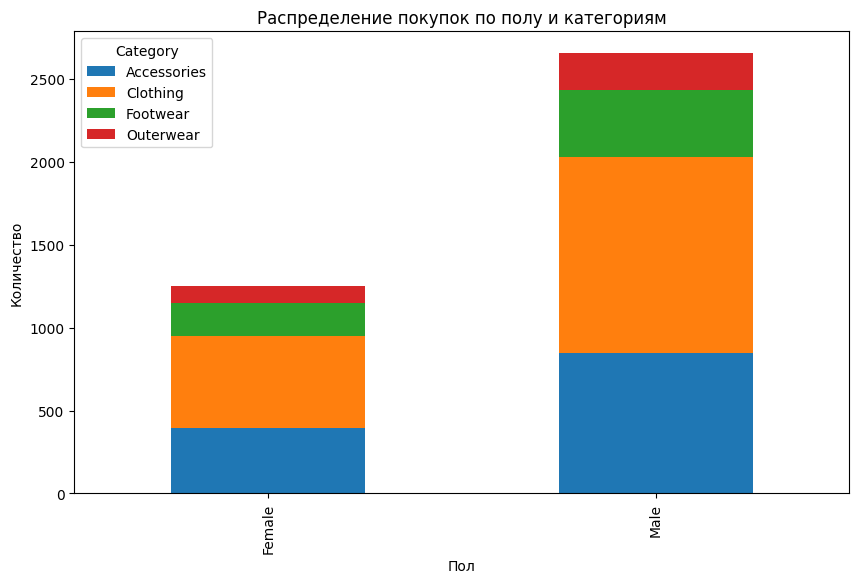

In [25]:
gender_category = data.groupby(["Gender", "Category"]).size().unstack().fillna(0)
gender_category.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Распределение покупок по полу и категориям")
plt.ylabel("Количество")
plt.xlabel("Пол")
plt.show()

In [26]:
gender_category

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


In [27]:
female_accessories = data[(data["Gender"] == "Female") & (data["Category"] == "Accessories")]
male_accessories = data[(data["Gender"] == "Male") & (data["Category"] == "Accessories")]
female_accessories_ratio = len(female_accessories) / len(data[data["Gender"] == "Female"]) * 100
male_accessories_ratio = len(male_accessories) / len(data[data["Gender"] == "Male"]) * 100
print(f"Доля покупки аксессуаров среди женщин: {female_accessories_ratio:.2f}%")
print(f"Доля покупки аксессуаров среди мужчин: {male_accessories_ratio:.2f}%")

Доля покупки аксессуаров среди женщин: 31.41%
Доля покупки аксессуаров среди мужчин: 31.98%


Количество аксессуаров, купленных мужчинами в 2 раза больше, чем женщинами, но при этом доли аксессуаров в общих покупках почти одинаковы. Поэтому, нет, частота покупок аксессуаров и мужчин и женщин одинакова.

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

In [28]:
popular_item = data["Item Purchased"].value_counts().idxmax()
popular_item_count = data["Item Purchased"].value_counts().max()

print(f"Самый популярный товар: {popular_item} (куплен {popular_item_count} раз)")

Самый популярный товар: Blouse (куплен 171 раз)


<ipython-input-29-6c9784f13c99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette="pastel")


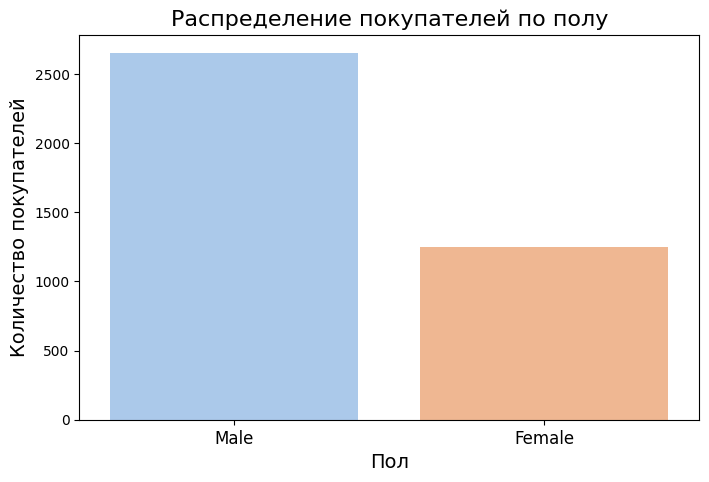

In [29]:
gender_distribution = data["Gender"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette="pastel")
plt.title("Распределение покупателей по полу", fontsize=16)
plt.xlabel("Пол", fontsize=14)
plt.ylabel("Количество покупателей", fontsize=14)
plt.xticks(fontsize=12)
plt.show()

In [30]:
df = data.copy()

In [31]:
frequency_mapping = {
    "Annually": 1 / 12,
    "Quarterly": 4,
    "Monthly": 12,
    "Bi-Weekly": 26,
    "Fortnightly": 26,
    "Weekly": 52,
    "Every 3 Months": 4,
}
df["Frequency_Numeric"] = df["Frequency of Purchases"].map(frequency_mapping)
df["Purchase Amount (USD)"] = pd.to_numeric(df["Purchase Amount (USD)"], errors="coerce")
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df_cleaned = df.dropna(subset=["Frequency_Numeric", "Purchase Amount (USD)", "Age", "Gender"])

In [32]:
most_purchases_gender = df_cleaned["Gender"].value_counts().idxmax()
most_frequent_gender = df_cleaned.groupby("Gender")["Frequency_Numeric"].mean().idxmax()
highest_spending_gender = df.groupby("Gender")["Purchase Amount (USD)"].mean().idxmax()
print(f"Пол, который больше всего покупает: {most_purchases_gender}")
print(f"Пол, который чаще всего покупает: {most_frequent_gender}")
print(f"Пол, который покупает самые дорогие товары: {highest_spending_gender}")

Пол, который больше всего покупает: Male
Пол, который чаще всего покупает: Female
Пол, который покупает самые дорогие товары: Female


In [33]:
most_purchases_age = df_cleaned["Age"].value_counts().idxmax()
most_frequent_age = df_cleaned.groupby("Age")["Frequency_Numeric"].mean().idxmax()
highest_spending_age = df_cleaned.groupby("Age")["Purchase Amount (USD)"].mean().idxmax()
print(f"Возраст, который больше всего покупает: {most_purchases_age}")
print(f"Возраст, который чаще всего покупает: {most_frequent_age}")
print(f"Возраст, который покупает самые дорогие товары: {highest_spending_age}")

Возраст, который больше всего покупает: 69
Возраст, который чаще всего покупает: 65
Возраст, который покупает самые дорогие товары: 53


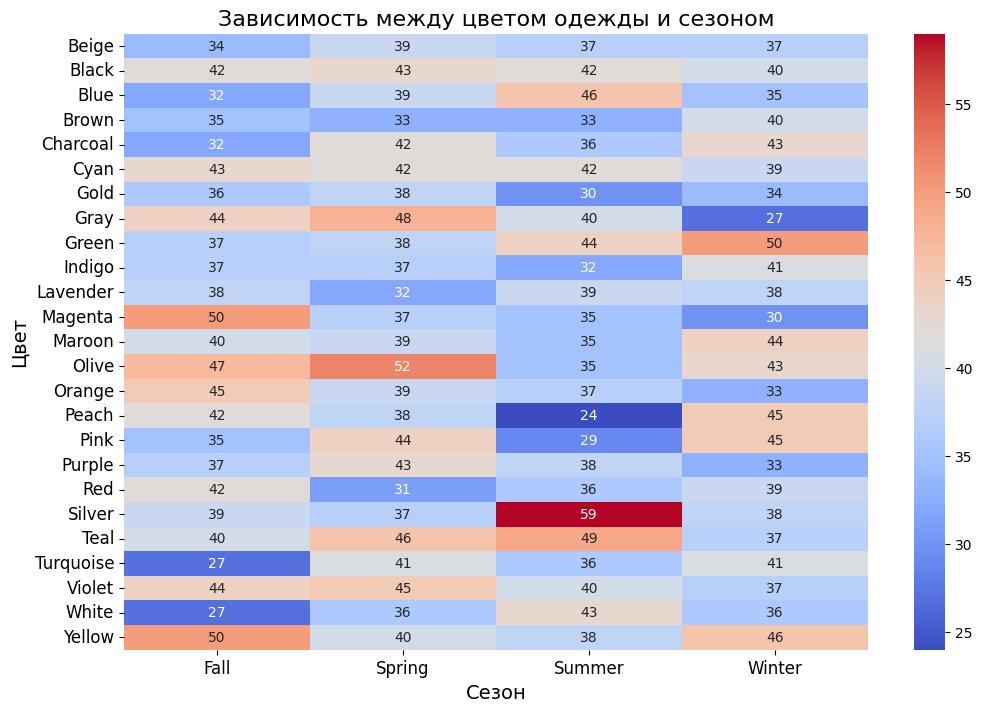

In [34]:
color_season_pivot = data.pivot_table(index="Color", columns="Season", values="Customer ID", aggfunc="count", fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(color_season_pivot, annot=True, fmt="d", cmap="coolwarm")
plt.title("Зависимость между цветом одежды и сезоном", fontsize=16)
plt.xlabel("Сезон", fontsize=14)
plt.ylabel("Цвет", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

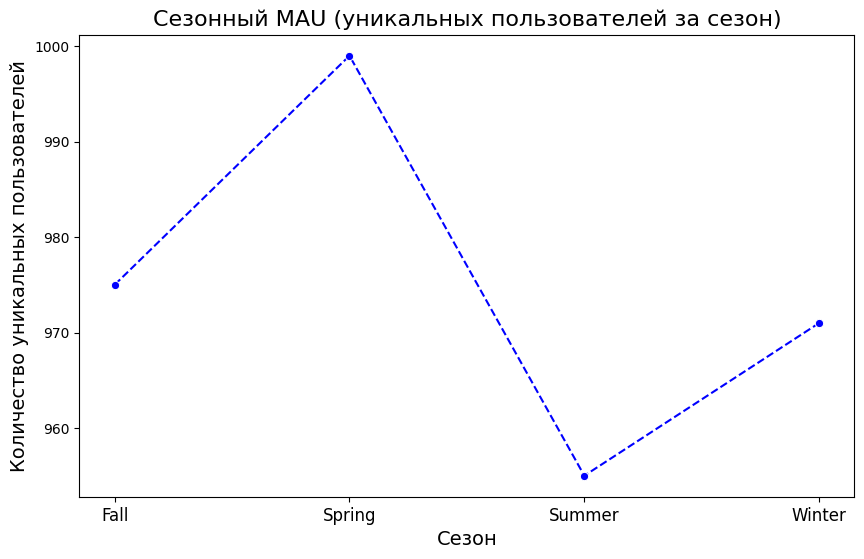

Сезонный MAU (уникальные пользователи за сезон):
Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64


In [35]:
seasonal_mau = data.groupby("Season")["Customer ID"].nunique()
plt.figure(figsize=(10, 6))
sns.lineplot(x=seasonal_mau.index, y=seasonal_mau.values, marker="o", linestyle="--", color="blue")
plt.title("Сезонный MAU (уникальных пользователей за сезон)", fontsize=16)
plt.xlabel("Сезон", fontsize=14)
plt.ylabel("Количество уникальных пользователей", fontsize=14)
plt.xticks(fontsize=12)
plt.show()
print("Сезонный MAU (уникальные пользователи за сезон):")
print(seasonal_mau)

In [36]:
from collections import Counter
all_letters = "".join(data["Item Purchased"]).lower()
letter_counts = Counter(filter(str.isalpha, all_letters))
most_common_letter, most_common_count = letter_counts.most_common(1)[0]
print(f"Самая популярная буква в названии одежды: {most_common_letter} (встречается {most_common_count} раз)")

Самая популярная буква в названии одежды: s (встречается 4063 раз)


<h1>Задание 2</h1>

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [37]:
df_drinks= pd.read_csv("drinks.csv")

In [38]:
df_drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


1. Страна, где пьется больше пива.

In [39]:
max_beer = df_drinks.loc[df_drinks['beer_servings'].idxmax()]
print(f"Страна с наибольшим потреблением пива: {max_beer['country']} (Пиво: {max_beer['beer_servings']})")

Страна с наибольшим потреблением пива: Namibia (Пиво: 376)


2. Страна, где пьется больше спиртных напитков (не вино и пиво).

In [40]:
max_spirit = df_drinks.loc[df_drinks['spirit_servings'].idxmax()]
print(f"Страна с наибольшим потреблением спиртных напитков: {max_spirit['country']} (Спиртные напитки: {max_spirit['spirit_servings']})")

Страна с наибольшим потреблением спиртных напитков: Grenada (Спиртные напитки: 438)


Графики потребления каждого напитка.

<ipython-input-41-d886c53b12d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='beer_servings', data=df_drinks, palette="Blues_d")


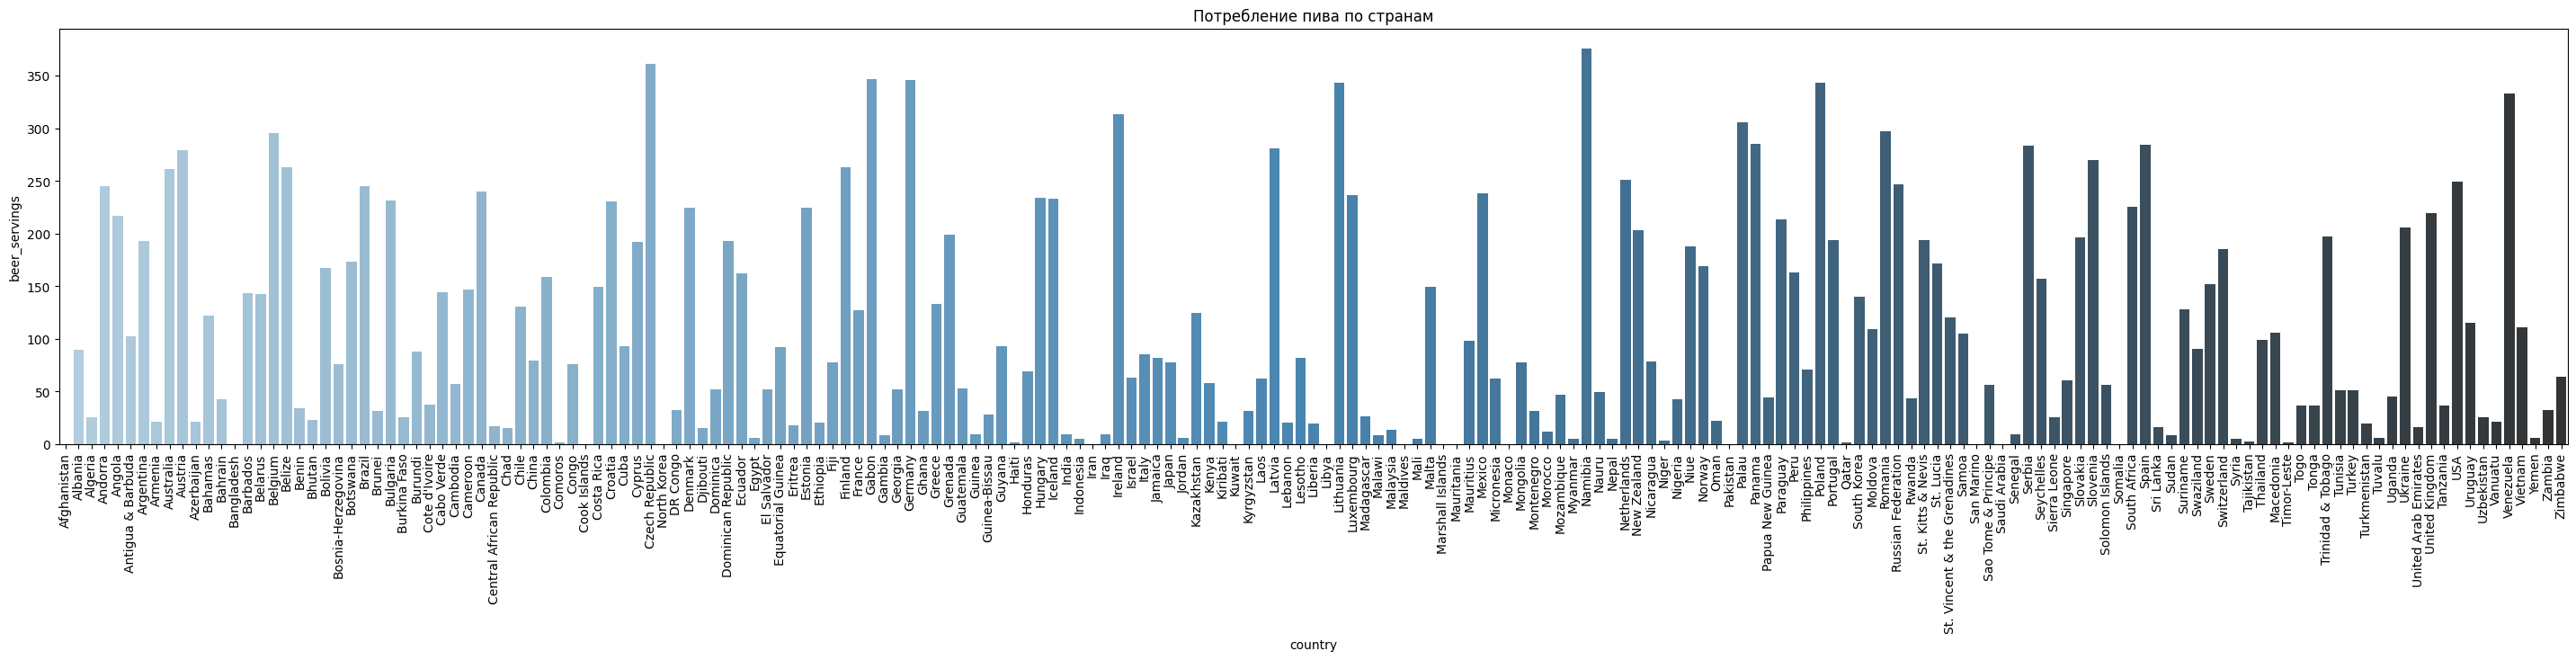

In [41]:
plt.figure(figsize=(36, 6))
sns.barplot(x='country', y='beer_servings', data=df_drinks, palette="Blues_d")
plt.title('Потребление пива по странам')
plt.xticks(rotation=90)
plt.show()

<ipython-input-42-0d204b061478>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='spirit_servings', data=df_drinks, palette="Reds_d")


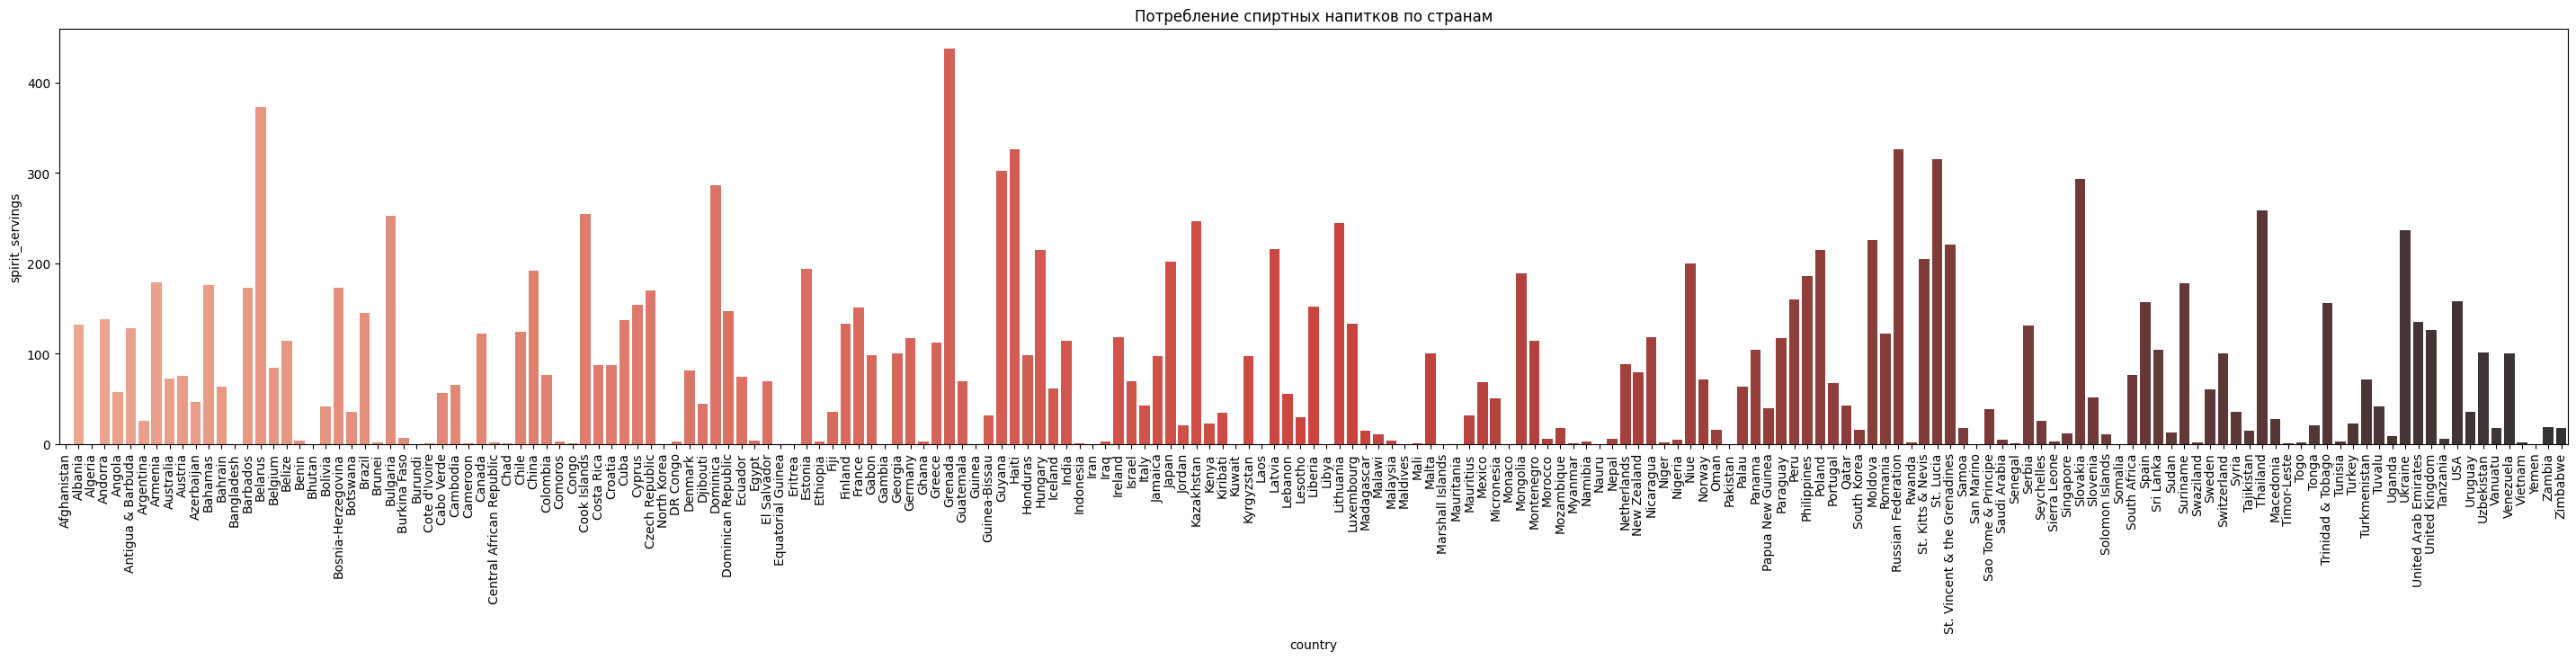

In [42]:
plt.figure(figsize=(36,6))
sns.barplot(x='country', y='spirit_servings', data=df_drinks, palette="Reds_d")
plt.title('Потребление спиртных напитков по странам')
plt.xticks(rotation=90)
plt.show()

<ipython-input-43-85add19ac872>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='wine_servings', data=df_drinks, palette="Purples_d")


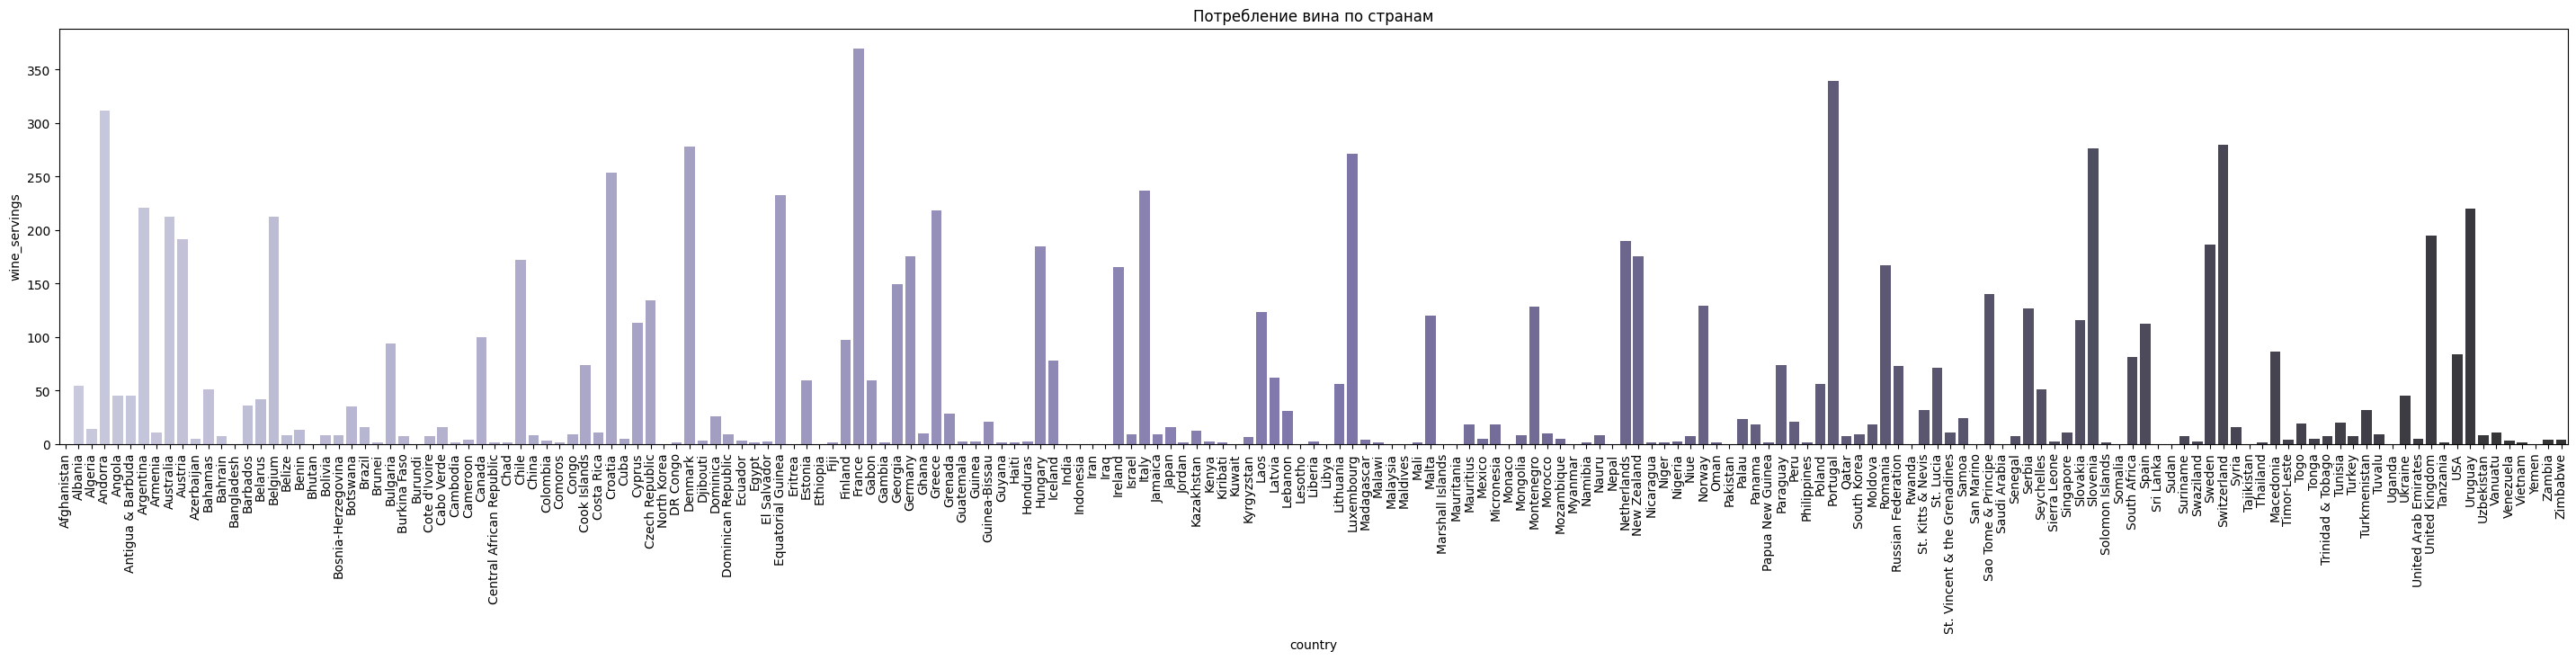

In [43]:
plt.figure(figsize=(36, 6))
sns.barplot(x='country', y='wine_servings', data=df_drinks, palette="Purples_d")
plt.title('Потребление вина по странам')
plt.xticks(rotation=90)
plt.show()

Корреляция между потреблением напитков.

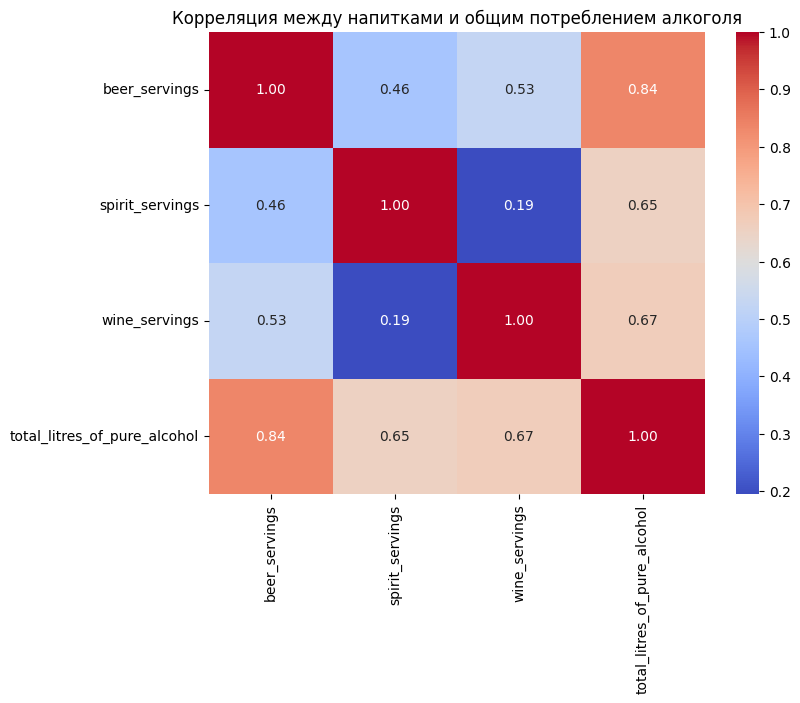

In [44]:
corr = df_drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между напитками и общим потреблением алкоголя')
plt.show()

Посмотрм топ-5 стран с максимальным и минимальным потреблением.

In [45]:
def print_top_bottom(df, column_name):
    #уберем значения 0, так как это, скорее всего, отсутствие данных
    df_non_zero = df[df[column_name] != 0]
    top_5 = df_non_zero.nlargest(5, column_name)[['country', column_name]]
    bottom_5 = df_non_zero.nsmallest(5, column_name)[['country', column_name]]

    print(f"Топ-5 стран с максимальным потреблением по {column_name}:")
    print(top_5)
    print("\n")
    print(f"Топ-5 стран с минимальным потреблением по {column_name}:")
    print(bottom_5)
    print("\n" + "-"*50 + "\n")

print_top_bottom(df_drinks, 'beer_servings')
print_top_bottom(df_drinks, 'spirit_servings')
print_top_bottom(df_drinks, 'wine_servings')
print_top_bottom(df_drinks, 'total_litres_of_pure_alcohol')

Топ-5 стран с максимальным потреблением по beer_servings:
            country  beer_servings
117         Namibia            376
45   Czech Republic            361
62            Gabon            347
65          Germany            346
98        Lithuania            343


Топ-5 стран с минимальным потреблением по beer_servings:
         country  beer_servings
38       Comoros              1
73         Haiti              1
137        Qatar              1
171  Timor-Leste              1
168   Tajikistan              2

--------------------------------------------------

Топ-5 стран с максимальным потреблением по spirit_servings:
                country  spirit_servings
68              Grenada              438
15              Belarus              373
73                Haiti              326
141  Russian Federation              326
144           St. Lucia              315


Топ-5 стран с минимальным потреблением по spirit_servings:
          country  spirit_servings
28  Cote d'Ivoire         

<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [46]:
df_tarantino= pd.read_csv("tarantino.csv")

In [47]:
df_tarantino.head(5)

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [48]:
df_tarantino["movie"].unique()

array(['Reservoir Dogs', 'Pulp Fiction', 'Kill Bill: Vol. 1',
       'Kill Bill: Vol. 2', 'Inglorious Basterds', 'Django Unchained',
       'Jackie Brown'], dtype=object)

In [49]:
df_tarantino["type"].unique()

array(['word', 'death'], dtype=object)

In [50]:
df_tarantino["word"].unique()

array(['dick', 'dicks', 'fucked', 'fucking', 'bullshit', 'fuck', 'shit',
       'motherfucker', 'pussy', 'fucks', 'hell', 'jap', 'bastard',
       'goddamn', 'motherfuckers', 'asshole', 'ass', 'assholes',
       'n-word ', 'asses', 'bitch', 'fuckup', 'fucker', 'shitty',
       'asshead', 'damn', nan, 'damned', 'bitches', 'wetback', 'faggot',
       'cocksucker', 'gook', 'fuckers', 'gooks', 'motherfucking',
       'dickless', 'chickenshit', 'slope', 'fuckhead', 'merde',
       'shithead', 'cunt', 'cunts', 'fuckface', 'cockblockery', 'japs',
       'jew (verb)', 'bastards', 'horeshit', 'shitless', 'shitting',
       'negro ', 'squaw', 'slut', 'goddamned', 'jackass', 'horseshit',
       'shittiest', 'shitload', 'dumbass'], dtype=object)

Число проклятий, летальных исходов и их соотношение по фильмам

In [51]:
count_by_movie = df_tarantino.groupby(['movie', 'type']).size().unstack(fill_value=0)
count_by_movie['death/word'] = count_by_movie['death'] / count_by_movie['word']
print(count_by_movie)

type                 death  word  death/word
movie                                       
Django Unchained        47   262    0.179389
Inglorious Basterds     48    58    0.827586
Jackie Brown             4   368    0.010870
Kill Bill: Vol. 1       63    57    1.105263
Kill Bill: Vol. 2       11    69    0.159420
Pulp Fiction             7   469    0.014925
Reservoir Dogs          10   421    0.023753


Частота употребления конкретных проклятий.

In [52]:
word_frequency = df_tarantino['word'].value_counts()
print(word_frequency)

word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards

Распределение времени между проклятиями.

Для расчтета распределения времени между проклятиями рассчитаем разницу между временными метками, которые идут друг за другом. Для этого отсортируем данные по фильму и времени, затем вычислим разницу между последовательными временными метками.

In [53]:
df_words = df_tarantino[df_tarantino['type'] == 'word']
df_words_sorted = df_words.sort_values(by=['movie', 'minutes_in'])
df_words_sorted['time_diff'] = df_words_sorted.groupby('movie')['minutes_in'].diff().fillna(0)

print(df_words_sorted[['movie', 'word', 'minutes_in', 'time_diff']])

                 movie     word  minutes_in  time_diff
1213  Django Unchained  goddamn        7.23       0.00
1215  Django Unchained  goddamn        8.37       1.14
1216  Django Unchained    bitch        8.38       0.01
1217  Django Unchained     damn        8.65       0.27
1218  Django Unchained  fucking        8.87       0.22
...                ...      ...         ...        ...
424     Reservoir Dogs  fucking       94.83       0.08
425     Reservoir Dogs  fucking       94.90       0.07
426     Reservoir Dogs  fucking       95.21       0.31
427     Reservoir Dogs  fucking       95.33       0.12
428     Reservoir Dogs  fucking       95.33       0.00

[1704 rows x 4 columns]


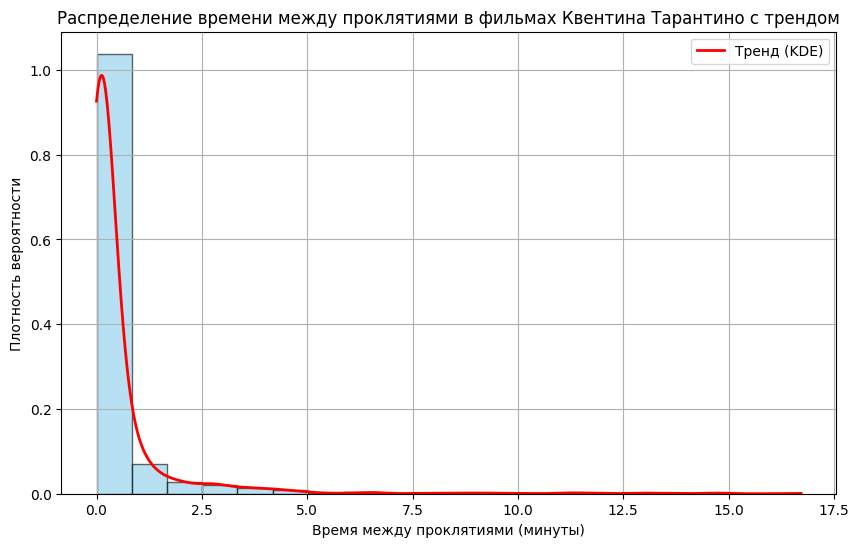

In [54]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(10, 6))
plt.hist(df_words_sorted['time_diff'], bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.6)
kde = gaussian_kde(df_words_sorted['time_diff'])
x_vals = np.linspace(min(df_words_sorted['time_diff']), max(df_words_sorted['time_diff']), 1000)
plt.plot(x_vals, kde(x_vals), color='red', lw=2, label='Тренд (KDE)')
plt.title('Распределение времени между проклятиями в фильмах Квентина Тарантино с трендом')
plt.xlabel('Время между проклятиями (минуты)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()